In [1]:
import os
from csv import reader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm


import data_filter as dafi
import estimate_height as esth

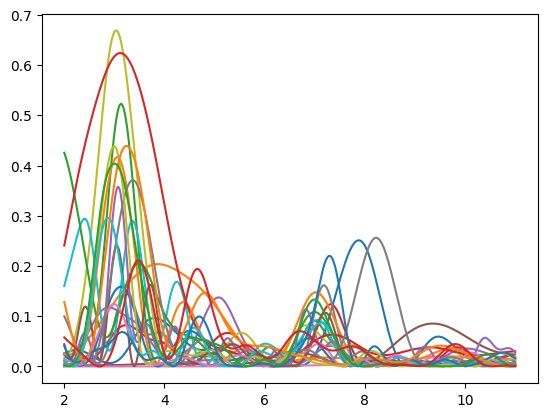

In [2]:
main_path = os.path.abspath('../data/20221004/2/')
data_dict = dafi.generate_dataframe(main_path)
satellite_list = data_dict.keys()
azimut_mask = [270,330]
elevation_mask = [0,60]
min_height = 2
max_height = 10 # meter
time_length = 25 # minutes
time_dict,height_dict,azimut_dict,elevation_dict,frequency_dict,power_dict = esth.estimate_all_satellite(main_path,azimut_mask,elevation_mask,min_height,max_height,time_length)

In [3]:
title = "2022-09-07"


In [4]:
ele_plot=[]
ele_err = [[],[]]
azi_plot=[]
azi_err=[[],[]]
h_plot=[]
for satellite_code in elevation_dict:
    for i,_ in enumerate(elevation_dict[satellite_code]):
        for h in height_dict[satellite_code]:
            ele_plot.append(elevation_dict[satellite_code][i]['avg'])
            ele_err[0].append(elevation_dict[satellite_code][i]['min'])
            ele_err[1].append(elevation_dict[satellite_code][i]['max'])
            azi_plot.append(azimut_dict[satellite_code][i]['avg'])
            azi_err[0].append(azimut_dict[satellite_code][i]['min'])
            azi_err[1].append(azimut_dict[satellite_code][i]['max'])
            h_plot.append(h)

norm = plt.Normalize(vmin=min(h_plot),vmax=max(h_plot))
norm = matplotlib.colors.Normalize(vmin=min(h_plot),vmax=max(h_plot), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='jet')
h_color = np.array([(mapper.to_rgba(v)) for v in h_plot])

In [8]:
3/np.tan(2/180*np.pi)

85.90875984874681

In [9]:
np.arctan(3/300)*180/np.pi

0.5729386976834859

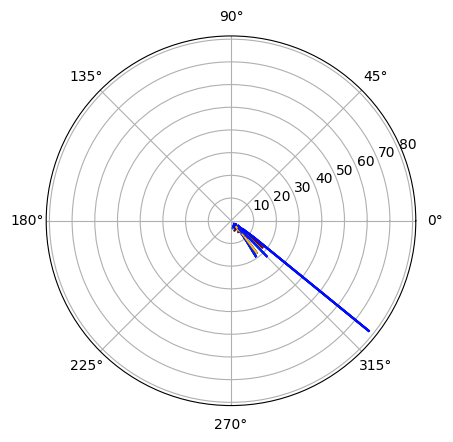

In [5]:
setting = "with height"
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for ele, azi, e_min, e_max, a_min, a_max, h, color in zip(ele_plot, azi_plot,\
    ele_err[0],ele_err[1], azi_err[0], azi_err[1], h_plot, h_color):
    h = 3
    a_range = np.linspace(a_min,a_max,100)
    e_range = np.linspace(e_min,e_max,100)
    
    if setting == "with height":
        ax.plot(a_range/180*np.pi, h/np.tan(e_range/180*np.pi), color=color)
    else:
        e_range = np.ones_like(e_range)
        ax.plot(a_range/180*np.pi, np.tan(e_range/180*np.pi), color=color)
    
    